# Film Industry Portfolio Project

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Reading the CSV file and checking the DataFrame.

df = pd.read_csv(r'C:\Users\marti\Python\Portfolio Projects\Film Industry\Movies Dataset.csv')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Data Exploration

In [3]:
# Checking data types.

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Calculating the percentage of missing values in each column.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, round(pct_missing*100)))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 28.00%
gross - 2.00%
company - 0.00%
runtime - 0.00%


In [5]:
# Displaying the list of unique companies.

df['company'].drop_duplicates().sort_values(ascending = True).dropna()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
6793                             i am OTHER
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 2385, dtype: object

# Changes in DataFrame

In [6]:
# Verifying if there are any movies where the 'year' and 'released' columns do not match.

df[df['year'] != pd.to_numeric(df['released'].str.split(', ').str[1].str[:4])][['year', 'released']]

,year,released
8,1980,"June 19, 1981 (United States)"
11,1980,"October 26, 1984 (United States)"
21,1980,"April 24, 1981 (United States)"
33,1980,"April 24, 1981 (United States)"
40,1980,"October 9, 1981 (United States)"
...,...,...
7525,2019,"January 17, 2020 (United States)"
7580,2019,"June 26, 2020 (United States)"
7584,2019,"February 4, 2020 (Australia)"
7604,2019,"May 19, 2020 (Poland)"


In [7]:
# Extracting the year from the 'released' column and adding it to a new one.
# Filling the missing values with 0 and converting it to an integer.

df['released_year'] = df['released'].str.split(', ').str[1].str[:4].fillna(0).astype('int64')

# Displaying the 'released_year' and 'released' columns for comparison.

df[['released_year', 'released']]

,released_year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
...,...,...
7663,2020,"October 23, 2020 (United States)"
7664,2020,"February 7, 2020 (United States)"
7665,2020,"April 27, 2020 (Cameroon)"
7666,2020,"October 1, 2020 (United States)"


In [8]:
# Setting the display format for floating-point numbers.

pd.set_option('display.float_format', '{:,.2f}'.format)

# Ordering the DataFrame by 'gross' column in descending order.

df.sort_values('gross', inplace = True, ascending = False)

# Dropping the 'year' column.

df.drop('year', axis = 1, inplace = True)

# Resetting the index and showing the final DataFrame.

df.reset_index(drop = True, inplace = True)

df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.00","2,847,246,203.00",Twentieth Century Fox,162.00,2009
1,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.00","2,797,501,328.00",Marvel Studios,181.00,2019
2,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.00","2,201,647,264.00",Twentieth Century Fox,194.00,1997
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.80,"876,000.00",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.00","2,069,521,700.00",Lucasfilm,138.00,2015
4,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.00","2,048,359,754.00",Marvel Studios,149.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000.00",NaN,NaN,90.00,2020
7664,Dream Round,NaN,Comedy,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,2020
7665,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750.00",NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000.00",NaN,NaN,120.00,2020


# Looking for Correlations

In [9]:
# Setting plot style and figure size.

plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12, 8)

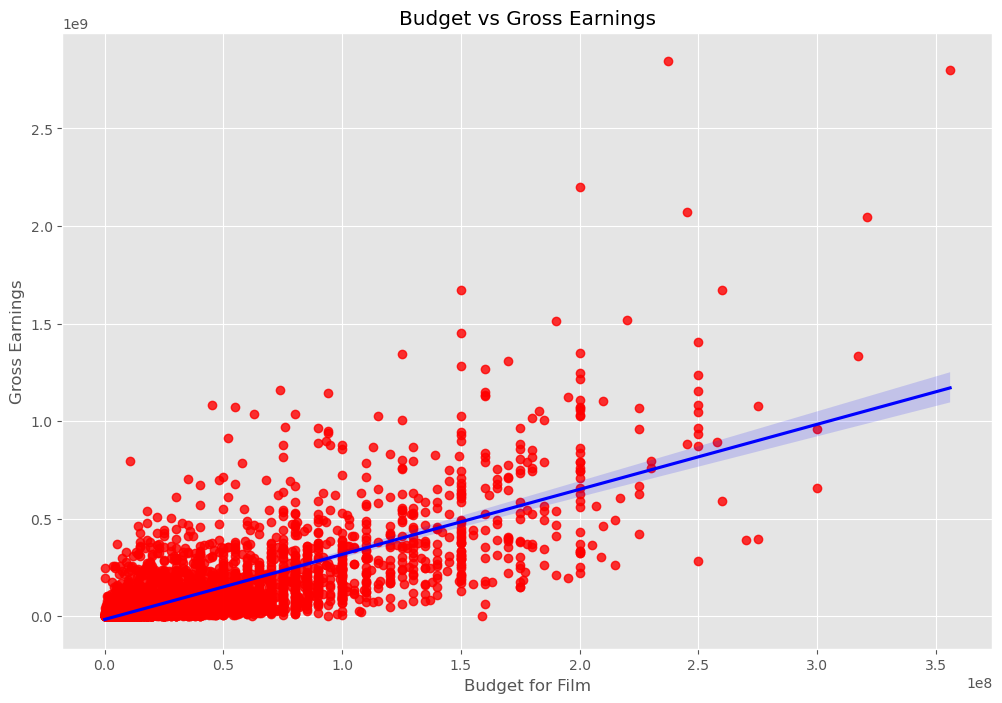

In [10]:
# Creating a regression plot of budget vs gross earnings.

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

# Setting the title.

plt.title('Budget vs Gross Earnings')

# Setting the labels.

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

# Showing the plot.

plt.show()

In [11]:
# Creating a new DataFrame based on the original one, but with the object columns converted to numeric values.

df_numbered = df.copy()

for col_name in df_numbered.columns:
    if (df_numbered[col_name].dtype == 'object'):
        df_numbered[col_name] = df_numbered[col_name].astype('category').cat.codes

# Creating a new DataFrame with selected features from 'df_numbered' and displaying it.

df_features = df_numbered[['gross', 'budget', 'votes', 'score', 'genre', 'country', 'company', 'released_year']]

df_features

,gross,budget,votes,score,genre,country,company,released_year
0,"2,847,246,203.00","237,000,000.00","1,100,000.00",7.80,0,55,2253,2009
1,"2,797,501,328.00","356,000,000.00","903,000.00",8.40,0,55,1606,2019
2,"2,201,647,264.00","200,000,000.00","1,100,000.00",7.80,6,55,2253,1997
3,"2,069,521,700.00","245,000,000.00","876,000.00",7.80,0,55,1540,2015
4,"2,048,359,754.00","321,000,000.00","897,000.00",8.40,0,55,1606,2018
...,...,...,...,...,...,...,...,...
7663,NaN,"7,000.00",18.00,3.10,6,55,-1,2020
7664,NaN,NaN,36.00,4.70,4,55,539,2020
7665,NaN,"58,750.00",29.00,5.70,6,55,941,2020
7666,NaN,"15,000.00",NaN,NaN,6,55,-1,2020


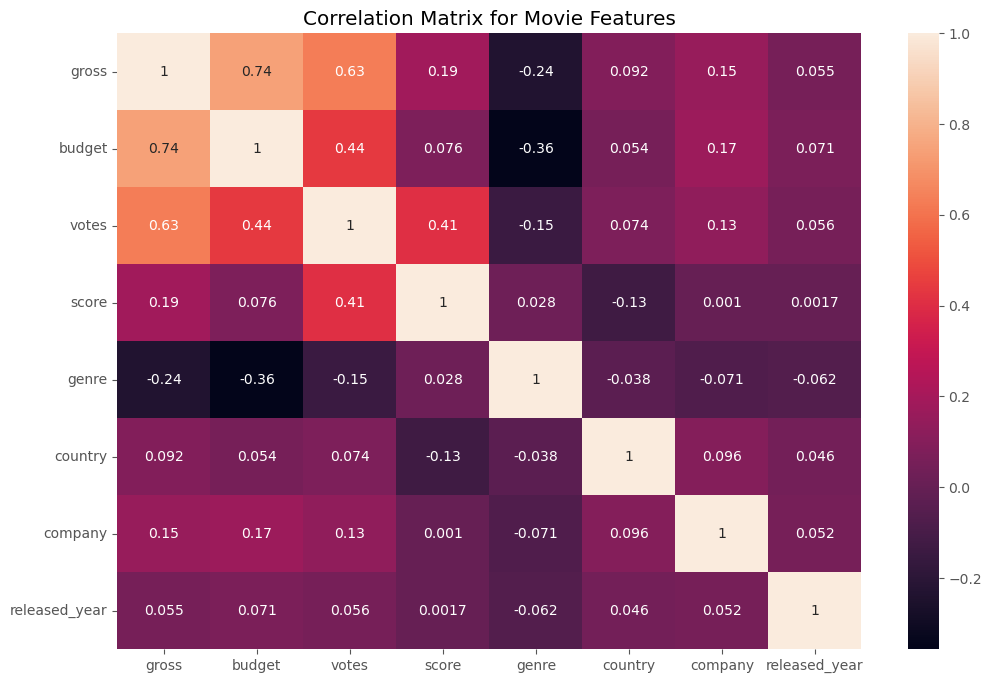

In [12]:
# Creating a correlation matrix.

sns.heatmap(df_features.corr(), annot = True)

# Setting the title.

plt.title('Correlation Matrix for Movie Features')

# Showing the plot.

plt.show()

In [13]:
# Finding the correlation between each pair of features.

correlation_results = df_features.corr().unstack().sort_values(ascending = False)

# Filtering the correlation results that are not equal to 1 and greater than 0.5.
# This way we can see the features that are highly correlated with each other.

filtered_correlation_results = correlation_results[(correlation_results != 1) & (correlation_results > 0.5)].drop_duplicates()

# Showing the filtered correlation results.

filtered_correlation_results

budget  gross   0.74
gross   votes   0.63
dtype: float64

# Getting Insights

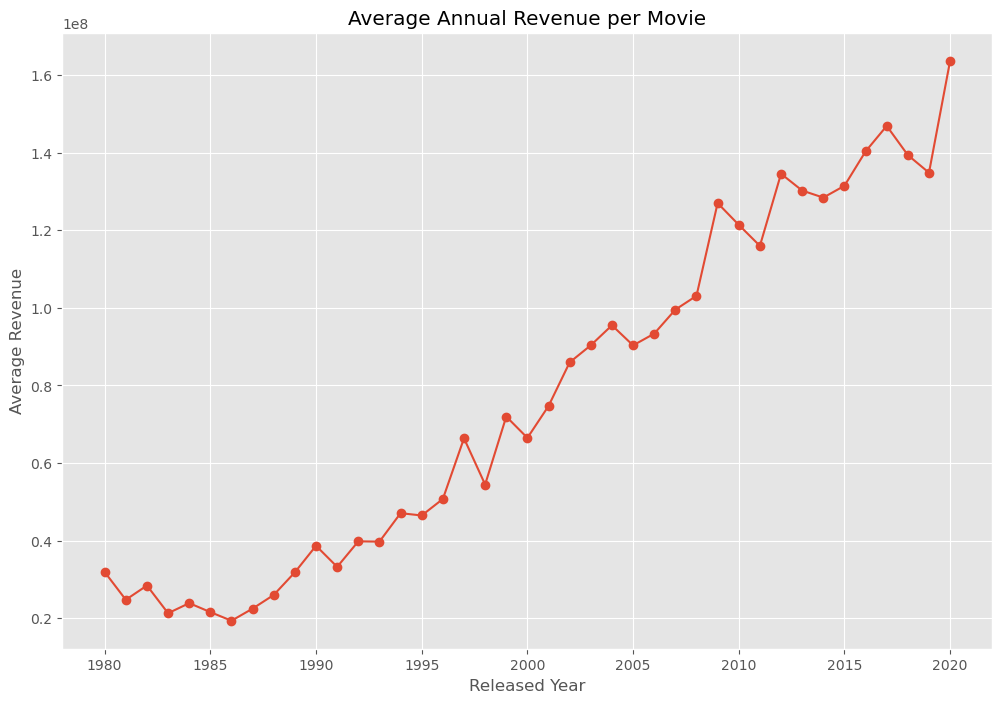

In [14]:
# Creating a DataFrame to show the average annual revenue per movie.

released_year_gross = df.groupby('released_year')['gross'].mean().to_frame().loc[lambda x: x.index != 0]

# Plotting the created DataFrame.

released_year_gross.plot(marker = 'o')

# Setting the title.

plt.title('Average Annual Revenue per Movie')

# Setting the labels.

plt.xlabel('Released Year')
plt.ylabel('Average Revenue')

# Removing the legend.

plt.legend().set_visible(False)

# Showing the plot.

plt.show()

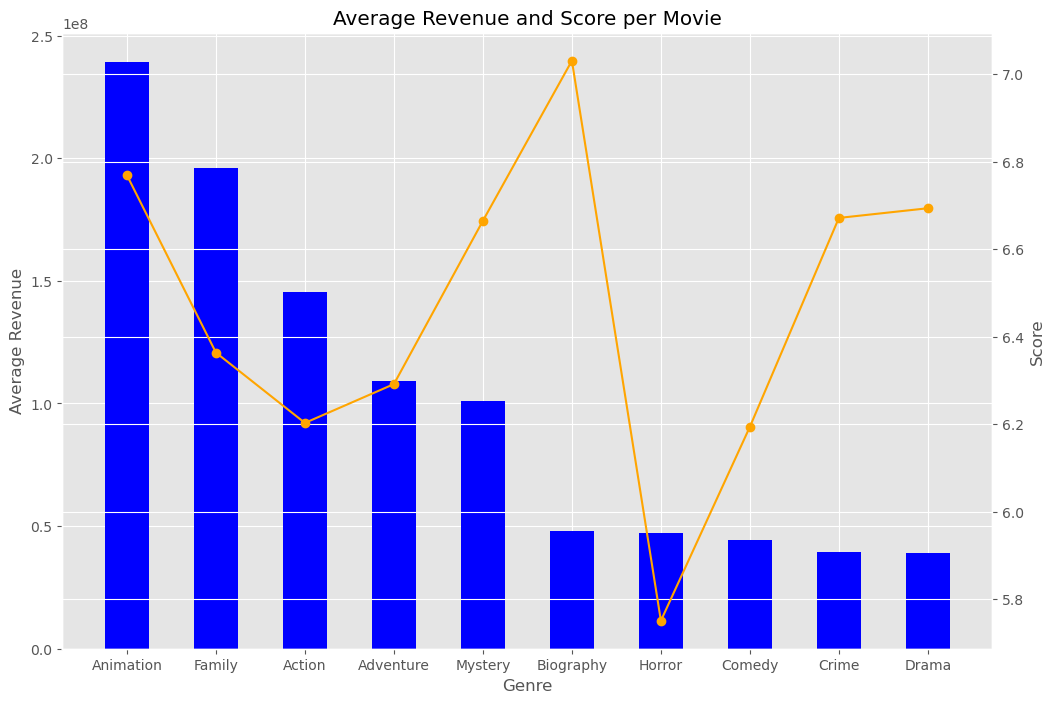

In [15]:
# Creating a DataFrame to show the average revenue and score per genre.

top_gross_genre = df.groupby('genre')[['gross', 'score']].mean().sort_values(by = 'gross', ascending = False).head(10)

# Creating a figure and axis object for plotting.

fig, ax1 = plt.subplots()

# Setting the title.

ax1.set_title('Average Revenue and Score per Movie')

# Plotting the genre and average revenue in a bar chart.

ax1.bar(top_gross_genre.index, top_gross_genre['gross'], color = 'blue', width = 0.5)

# Plotting the genre and average score in a line chart.

ax2 = ax1.twinx()
ax2.plot(top_gross_genre.index, top_gross_genre['score'], color = 'orange', marker = 'o')

# Setting the labels.

ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Revenue')
ax2.set_ylabel('Score')

# Showing the plot.

plt.show()

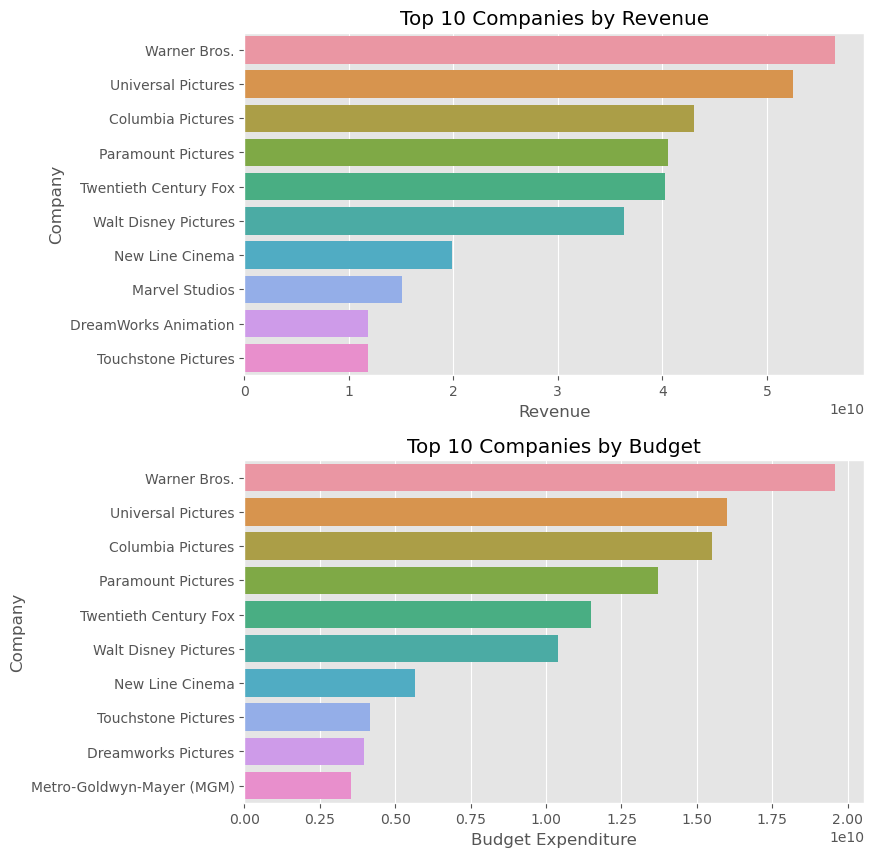

In [16]:
# Creating DataFrames to show the top 10 companies by revenue and budget.

df_companies_gross = df.groupby('company')[['gross']].sum().sort_values(by = 'gross', ascending = False).head(10)
df_companies_budget = df.groupby('company')[['budget']].sum().sort_values(by = 'budget', ascending = False).head(10)

# Creating a figure and axis object for plotting.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))

# Plotting the top 10 companies by revenue in a horizontal bar chart.

sns.barplot(data = df_companies_gross, y = df_companies_gross.index, x = 'gross', ax = ax1)

# Plotting the top 10 companies by budget in a horizontal bar chart.

sns.barplot(data = df_companies_budget, y = df_companies_budget.index, x = 'budget', ax = ax2)

# Setting the titles.

ax1.set_title('Top 10 Companies by Revenue')
ax2.set_title('Top 10 Companies by Budget')

# Setting the labels.

ax1.set_xlabel('Revenue')
ax1.set_ylabel('Company')
ax2.set_xlabel('Budget Expenditure')
ax2.set_ylabel('Company')

# Adjusting the spacing between subplots.

plt.subplots_adjust(hspace = 0.25)

# Showing the plot.

plt.show()